In [1]:
#21110040

In [2]:
!pip install google-play-scraper

In [3]:
from google_play_scraper import Sort, reviews
from google_play_scraper import app
import pandas as pd
import numpy as np

In [4]:
result, continuation_token = reviews(
    'com.shopee.id',
    lang = 'id',
    country= 'id',
    sort = Sort.MOST_RELEVANT,
    count = 1000,
    filter_score_with= None
)

In [5]:
data = pd.DataFrame(np.array(result), columns=['review'])
data = data.join(pd.DataFrame(data.pop('review') .tolist()))

In [6]:
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9b212797-d1ac-404f-b35b-fdd2c832307e,Aida EnFebriant,https://play-lh.googleusercontent.com/a-/ALV-U...,Sangat baik. Sebagai saran. Untuk list produk ...,4,4338,3.08.12,2023-09-13 13:47:37,None,NaT,3.08.12
1,90852a54-66b2-4bc7-8879-eb7059005251,Yengki,https://play-lh.googleusercontent.com/a/ACg8oc...,"Gak tau kenapa dlu apk ini tidak lemot,skrng t...",3,2508,3.08.12,2023-09-23 12:11:24,None,NaT,3.08.12
2,a43f0dc8-ba4c-4c72-b7e1-503b155b3aca,Aizzan RaQila,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasi lemot, terlalu banyak iklan, sekarang...",2,9896,3.08.08,2023-09-04 15:04:57,"Hi kak, maaf bikin km ga nyaman terkait kendal...",2023-09-04 16:24:01,3.08.08
3,91b5a35b-d7eb-452e-9605-27f1f5672a47,Lukman,https://play-lh.googleusercontent.com/a/ACg8oc...,Suka muncul iklan yang langsung ke aplikasi. K...,1,1514,3.08.12,2023-09-10 14:50:03,None,NaT,3.08.12
4,bde666e7-a98e-45d5-814f-5448545f951a,Faldya Yasser,https://play-lh.googleusercontent.com/a-/ALV-U...,"Mohon untuk pihak developer, tolong tambahkan ...",3,928,3.09.10,2023-09-26 18:27:51,"Hai kak, Mohon maaf atas terkait kendalanya. S...",2023-09-26 23:46:56,3.09.10
...,...,...,...,...,...,...,...,...,...,...,...
995,2516e553-2e87-4cb8-8526-673cee820465,Fredi Febriyono,https://play-lh.googleusercontent.com/a-/ALV-U...,"Saya tidak pernah pinjol, tpi kemarin saya dap...",1,20,3.06.14,2023-08-16 06:44:53,None,NaT,3.06.14
996,599496c0-9441-4a05-9add-785caecb4761,Malika Ruby Jane (I'm baapaaoouuu),https://play-lh.googleusercontent.com/a-/ALV-U...,"Hadeh skrg makin parah ya aplikasi nya,,makin ...",1,28,3.08.08,2023-08-26 09:42:25,"Hi Kak, maaf ya kendalanya.pada saat akses apl...",2023-08-26 10:02:42,3.08.08
997,8971c714-1ef9-4f69-9b50-bc5f8d227eda,Wulan Apriani,https://play-lh.googleusercontent.com/a/ACg8oc...,"Tolong dong di perbaiki lg sistem nya, makin s...",2,0,3.06.12,2023-08-03 14:37:09,None,NaT,3.06.12
998,22643110-3a4a-4f1e-889c-aa36998318d7,Jason Sihombing,https://play-lh.googleusercontent.com/a/ACg8oc...,"Sekarang aplikasi shopee kurang memuaskan, per...",2,5,3.05.11,2023-09-01 03:32:21,None,NaT,3.05.11


In [7]:
# Buat DataFrame dari data tersebut
df = pd.DataFrame(data)

# Simpan DataFrame ke file CSV
df.to_csv('data.csv', index=False)

In [8]:
# Cek apakah ada data null pada setiap kolom
null_data = df.isnull().sum()

print(null_data)

reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion      0
at                        0
replyContent            316
repliedAt               316
appVersion                0
dtype: int64


In [9]:
rating_counts = df['score'].value_counts().sort_index()

print(rating_counts)

1    449
2    150
3    107
4     83
5    211
Name: score, dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

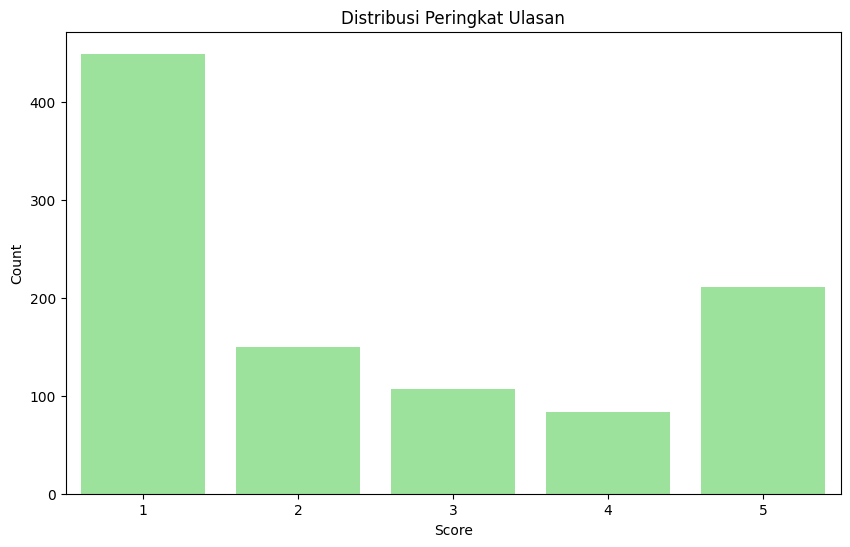

In [11]:
# Hitung Perhitungan setiap nilai skor
score_counts = df['score'].value_counts().reset_index()
score_counts.columns = ['Score', 'Count']

# Urutkan data berdasarkan nilai skor untuk diagram batang
score_counts = score_counts.sort_values(by='Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Count', data=score_counts, color='lightgreen')
plt.title('Distribusi Peringkat Ulasan')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

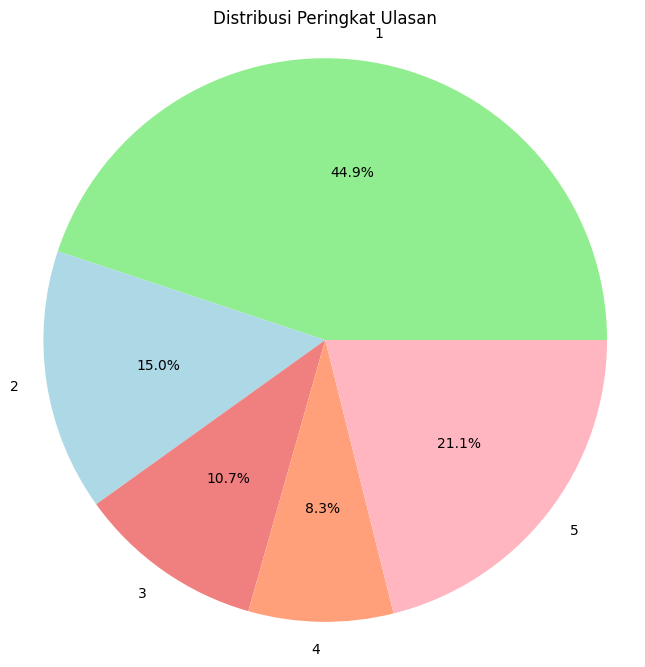

In [12]:
# Calculate the percentage for each score value
score_counts['Percentage'] = (score_counts['Count'] / score_counts['Count'].sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(score_counts['Percentage'], labels=score_counts['Score'], autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral', 'lightsalmon', 'lightpink'])
plt.title('Distribusi Peringkat Ulasan')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()